In [1]:
#Source https://stackabuse.com/time-series-analysis-with-lstm-using-pythons-keras-library/ 

Time series analysis refers to the analysis of change in the trend of the data over a period of time. Time series analysis has a variety of applications. One such application is the prediction of the future value of an item based on its past values. Future stock price prediction is probably the best example of such an application. In this article, we will see how we can perform time series analysis with the help of a recurrent neural network. We will be predicting the future stock prices of the Apple Company (AAPL), based on its stock prices of the past 5 years.


In this Python Notebook,  I am implementing the LSTM Recurrent Neural Network to forecast apple stock market! My Good reference is [here](https://stackabuse.com/time-series-analysis-with-lstm-using-pythons-keras-library/).  The apple Stock Data is obtained from yahoo finance: [here](https://finance.yahoo.com/quote/AAPL/history?period1=1356930000&period2=1514696400&interval=1d&filter=history&frequency=1d)

In [2]:

import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [3]:
fxn()

/nethome/gzewdie3/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: deprecated
  after removing the cwd from sys.path.


In [4]:
import numpy  as np
import matplotlib.pyplot as plt
import pandas as pd
import time

from pandas_datareader import data

The data that we are going to use for this article can be downloaded from Yahoo Finance. 
For training our algorithm, 
we will be using the Apple stock prices from 1st January 2013 to 31 December 2017.
For the sake of prediction, we will use the Apple stock prices for the month of January 2018.   

The following cell downloads stock prices for apple.

In [5]:
#import external pandas_datareader library with alias of web
import pandas_datareader as web
 
#import datetime internal datetime module
#datetime is a Python module
import datetime
 
#datetime.datetime is a data type within the datetime module
start = datetime.datetime(2017, 9, 1)
end = datetime.datetime(2017, 12, 31)
 
#DataReader method name is case sensitive
df = web.DataReader("aapl", 'yahoo', start, end)
 
#invoke to_csv for df dataframe object from 
#DataReader method in the pandas_datareader library
 
#..\first_yahoo_prices_to_csv_demo.csv must not
#be open in another app, such as Excel
 
df.to_csv('first_yahoo_prices_volumes_to_csv_demo.csv')

In [6]:
apple_training_complete = pd.read_csv('AAPL.csv')
apple_testing_dataJan2018=pd.read_csv('AAPL2018.csv')

Let's now see how our data looks. Open the Apple stock price training file that contains data for five years. You will see that it contains seven columns: Date, Open, High, Low, Close, Adj Close and Volume. We will be predicting the opening stock price, therefore we are not interested in the rest of the columns.

In [7]:
apple_training_complete.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-12-31,72.932854,76.485718,72.714287,76.024284,66.936584,164873100
1,2013-01-02,79.117142,79.285713,77.375717,78.432854,69.057251,140129500
2,2013-01-03,78.268570,78.524284,77.285713,77.442856,68.185600,88241300
3,2013-01-04,76.709999,76.947144,75.118568,75.285713,66.286301,148583400
4,2013-01-07,74.571426,75.614288,73.599998,74.842857,65.896370,121039100


In [8]:
apple_training_complete.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1255,2017-12-22,174.679993,175.419998,174.500000,175.009995,170.379120,16349400
1256,2017-12-26,170.800003,171.470001,169.679993,170.570007,166.056595,33185500
1257,2017-12-27,170.100006,170.779999,169.710007,170.600006,166.085815,21498200
1258,2017-12-28,171.000000,171.850006,170.479996,171.080002,166.553101,16480200
1259,2017-12-29,170.520004,170.589996,169.220001,169.229996,164.752060,25999900


In [9]:
apple_testing_dataJan2018.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,170.160004,172.300003,169.259995,172.259995,167.701889,25555900
1,2018-01-03,172.529999,174.550003,171.960007,172.229996,167.672668,29517900
2,2018-01-04,172.539993,173.470001,172.080002,173.029999,168.451508,22434600
3,2018-01-05,173.440002,175.369995,173.050003,175.000000,170.369385,23660000
4,2018-01-08,174.350006,175.610001,173.929993,174.350006,169.736588,20567800


In [10]:
apple_training_complete.shape

(1260, 7)

In [11]:
apple_training_complete.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1.260000e+03
mean,106.926082,107.805451,106.020870,106.936653,100.136660,5.654290e+07
std,29.634056,29.750966,29.484063,29.651850,30.183764,3.745789e+07
min,55.424286,57.085712,55.014286,55.790001,49.407326,1.147590e+07
25%,79.578216,80.328572,79.085354,79.580713,71.828089,3.042642e+07
50%,107.859996,108.860000,106.759998,107.860001,101.000915,4.649810e+07
75%,125.972498,126.894998,124.887501,125.877503,116.791454,7.058118e+07
max,175.110001,177.199997,174.860001,176.419998,171.751816,3.652131e+08


As we said earlier, we are only interested in the opening price of the stock. Therefore, we will filter all the data from our training set and will retain only the values for the Open column

In [12]:
apple_training_processed = apple_training_complete.iloc[:, 1:2].values

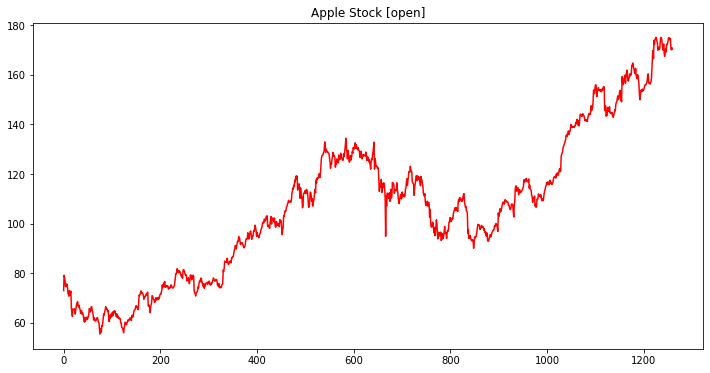

In [13]:
plt.figure(figsize=(12,6))
plt.plot(apple_training_processed,'r')
plt.title('Apple Stock [open]')
plt.show()

You can see in the above figure that the trend is highly non-linear and it is very difficult to capture the trend using this information. This is where the power of LSTM can be utilized. LSTM (Long Short-Term Memory network) is a type of recurrent neural network capable of remembering the past information and while predicting the future values, it takes this past information into account.

# Data Normalization

Whenever we use a neural network, we should normalize or scale our data. 
We will use MinMaxScaler class from the sklear.preprocessing library to scale our 
data between 0 and 1. The feature_range parameter is used to specify the range of the scaled data. 
Execute the following script:



In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

apple_training_scaled = scaler.fit_transform(apple_training_processed)

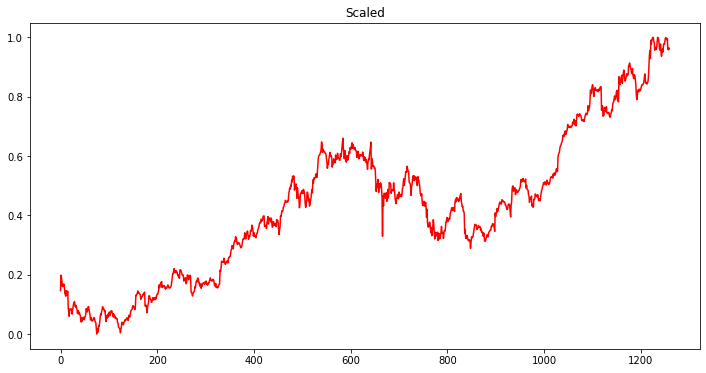

In [15]:
plt.figure(figsize=(12,6))
plt.plot(apple_training_scaled,'r')
plt.title('Scaled')
plt.show()

# Convert Training Data to Right Shape


As explained earlier, in a time series problems, we have to predict a value at time T, based on the data from days T-N where N can be any number of steps. In this article, we are going to predict the opening stock price of the data based on the opening stock prices for the past 60 days. I have tried and tested different numbers and found that the best results are obtained when past 60 time steps are used. You can try different numbers and see how your algorithm performs.

Our feature set should contain the opening stock price values for the past 60 days while the label or dependent variable should be the stock price at the 61st day. Execute the following script to create feature and label set.

In [16]:
features_set = []
labels = []
for i in range(60, 1260):
    #print(i)
    features_set.append(apple_training_scaled[i-60:i, 0])
    labels.append(apple_training_scaled[i, 0])
#     print(features_set)
#     print(labels)
#     time.sleep(30) # seconds

In [17]:
np.shape(features_set)

(1200, 60)

In the script above we create two lists: feature_set and labels. There are 1260 records in the training data. We execute a loop that starts from 61st record and stores all the previous 60 records to the feature_set list. The 61st record is stored in the labels list.

We need to convert both the feature_set and the labels list to the numpy array before we can use it for training. Execute the following script:



In [18]:
features_set, labels = np.array(features_set), np.array(labels)

In order to train LSTM on our data, we need to convert our data into the shape accepted by the LSTM. We need to convert our data into three-dimensional format. The first dimension is the number of records or rows in the dataset which is 1260 in our case. The second dimension is the number of time steps which is 60 while the last dimension is the number of indicators. Since we are only using one feature, i.e Open, the number of indicators will be one. Execute the following script:

In [19]:
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))

In [20]:
features_set.shape

(1200, 60, 1)

# Training The LSTM


We have preprocessed our data and have converted it into the desired format.
Now is the time to create our LSTM. The LSTM model that we are going to create will 
be a sequential model with multiple layers. We will add four LSTM layers to our model 
followed by a dense layer that predicts the future stock price.

In [21]:
# Let's first import the libraries that we are going to need in order to create our model:   
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In the script above we imported the Sequential class from keras.models library and Dense, LSTM, and Dropout classes from keras.layers library.

As a first step, we need to instantiate the Sequential class. This will be our model class and we will add LSTM, Dropout and Dense layers to this model. Execute the following script

In [22]:
model = Sequential()

# Creating LSTM and Dropout Layers

Let's add LSTM layer to the model that we just created. Execute the following script to do so:

In [23]:
model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1)))

To add a layer to the sequential model, the add method is used. Inside the add method, we passed our LSTM layer. The first parameter to the LSTM layer is the number of neurons or nodes that we want in the layer. The second parameter is return_sequences, which is set to true since we will add more layers to the model. The first parameter to the input_shape is the number of time steps while the last parameter is the number of indicators.

Let's now add a dropout layer to our model. Dropout layer is added to avoid over-fitting, which is a phenomenon where a machine learning model performs better on the training data compared to the test data. 
Execute the following script to add dropout layer.

In [24]:
model.add(Dropout(0.2))

Let's add three more LSTM and dropout layers to our model. Run the following script.

In [25]:
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

# Creating Dense Layer


To make our model more robust, we add a dense layer at the end of the model. The number of neurons in the dense layer will be set to 1 since we want to predict a single value in the output.

In [26]:
model.add(Dense(units = 1))

# Model Compilation

Finally, we need to compile our LSTM before we can train it on the training data. The following script compiles the our model.

In [27]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

We call the compile method on the Sequential model object which is "model" 
in our case. We use the mean squared error as loss function and to reduce the 
loss or to optimize the algorithm, we use the adam optimizer.

# Algorithm Training

Now is the time to train the model that we defined in the previous few steps. To do so, 
we call the fit method on the model and pass it our training features and labels as shown below:

In [28]:
model.fit(features_set, labels, epochs = 100, batch_size = 32,validation_split=0.04)

Train on 1152 samples, validate on 48 samples
Epoch 1/100
1152/1152 [==============================] - 3s 3ms/step - loss: 0.0329 - val_loss: 0.0072
Epoch 2/100
1152/1152 [==============================] - 2s 1ms/step - loss: 0.0049 - val_loss: 0.0040
Epoch 3/100
1152/1152 [==============================] - 2s 2ms/step - loss: 0.0044 - val_loss: 0.0062
Epoch 4/100
1152/1152 [==============================] - 2s 2ms/step - loss: 0.0043 - val_loss: 0.0118
Epoch 5/100
1152/1152 [==============================] - 2s 1ms/step - loss: 0.0040 - val_loss: 0.0088
Epoch 6/100
1152/1152 [==============================] - 2s 2ms/step - loss: 0.0038 - val_loss: 0.0050
Epoch 7/100
1152/1152 [==============================] - 2s 1ms/step - loss: 0.0037 - val_loss: 0.0136
Epoch 8/100
1152/1152 [==============================] - 2s 1ms/step - loss: 0.0036 - val_loss: 0.0091
Epoch 9/100
1152/1152 [==============================] - 2s 1ms/step - loss: 0.0031 - val_loss: 0.0020
Epoch 10/100
1152/1152 [===

1152/1152 [==============================] - 2s 2ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 80/100
1152/1152 [==============================] - 2s 2ms/step - loss: 0.0012 - val_loss: 0.0019
Epoch 81/100
1152/1152 [==============================] - 2s 1ms/step - loss: 0.0012 - val_loss: 8.8380e-04
Epoch 82/100
1152/1152 [==============================] - 2s 1ms/step - loss: 0.0012 - val_loss: 8.4157e-04
Epoch 83/100
1152/1152 [==============================] - 2s 2ms/step - loss: 0.0012 - val_loss: 7.9393e-04
Epoch 84/100
1152/1152 [==============================] - 2s 1ms/step - loss: 0.0012 - val_loss: 7.4892e-04
Epoch 85/100
1152/1152 [==============================] - 2s 1ms/step - loss: 0.0011 - val_loss: 7.2800e-04
Epoch 86/100
1152/1152 [==============================] - 2s 1ms/step - loss: 0.0011 - val_loss: 7.5232e-04
Epoch 87/100
1152/1152 [==============================] - 2s 2ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 88/100
1152/1152 [=============================

# Testing our LSTM

We have successfully trained our LSTM, now is the time to test the performance of our algorithm on the test set by predicting the opening stock prices for the month of January 2018. However, as we did with the training data, we need to convert our test data in the right format.

In [29]:
apple_testing_processed=apple_testing_dataJan2018.iloc[:, 1:2].values


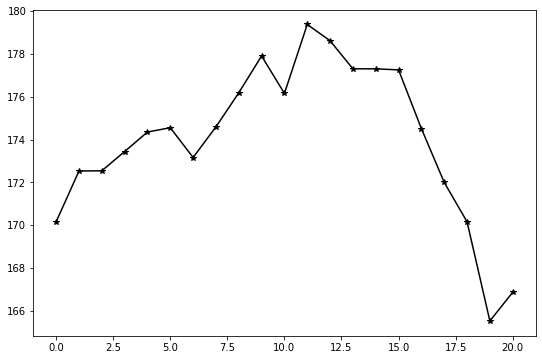

In [30]:
plt.figure(figsize=(9,6))
plt.plot(apple_testing_processed,'*-k')
plt.show()

You can see that the trend is highly non-linear. Overall, the stock prices see small rise at the start of the month followed by a downward trend at the end of the month, with a slight increase and decrease in the stock prices in-between. It is extremely difficult to forecast such a trend. Let's see if the LSTM we trained is actually able to predict such a trend.

# Converting Test Data to Right Format

For each day of January 2018, we want our feature set to contain the opening stock prices for the previous 60 days. For the 1st of January, we need the stock prices for the previous 60 days. To do so, we need to concatenate our training data and test data before preprocessing. Execute the following script to do so:

In [31]:
apple_total = pd.concat((apple_training_complete['Open'], apple_testing_dataJan2018['Open']), axis=0)

In [32]:
apple_total.shape

(1281,)

Now let's prepare our test inputs. The input for each day should contain the opening stock prices for the previous 60 days. That means we need opening stock prices for the 20 test days for the month of January 2018 and the 60 stock prices from the last 60 days for the training set. Execute the following script to fetch those 80 values.

In [33]:
test_inputs = apple_total[len(apple_total) - len(apple_testing_dataJan2018) - 60:].values

In [34]:
len(test_inputs)

81

As we did for the training set, we need to scale our test data. Execute the following script:

In [35]:
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)

In [36]:
len(test_inputs)

81

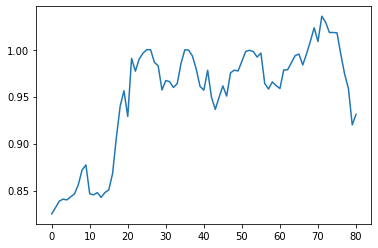

In [37]:
plt.plot(test_inputs)
plt.show()

We scaled our data, now let's prepare our final test input set that will contain previous 60 stock prices for the month of January. Execute the following script:

In [38]:
test_features = []
for i in range(60, 80):
    test_features.append(test_inputs[i-60:i, 0])

In [39]:
np.shape(test_features)

(20, 60)

Finally, we need to convert our data into the three-dimensional format which can be used as input to the LSTM. Execute the following script:

In [40]:
test_features = np.array(test_features)
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))

In [41]:
np.shape(test_features)

(20, 60, 1)

# Making Predictions

Now is the time to see the magic. We preprocessed our test data and now we can use it to make predictions. To do so, we simply need to call the predict method on the model that we trained. 
Execute the following script:

In [42]:
predictions = model.predict(test_features)

Since we scaled our data, the predictions made by the LSTM are also scaled. We need to reverse the scaled prediction back to their actual values. To do so, we can use the ìnverse_transform method of the scaler object we created during training. 
Take a look at the following script:

In [43]:
predictions = scaler.inverse_transform(predictions)

Finally, let's see how well did our algorithm predicted the future stock prices. Execute the following script:

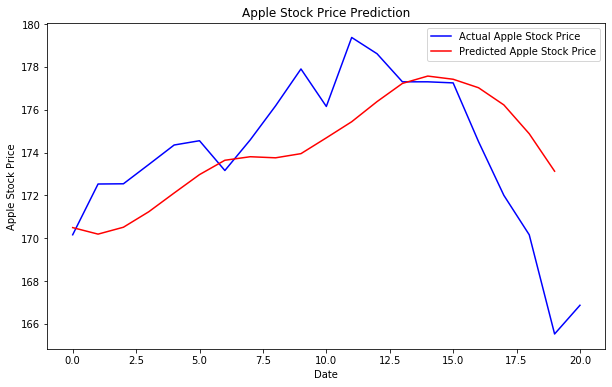

In [46]:
plt.figure(figsize=(10,6))
plt.plot(apple_testing_processed, color='blue', label='Actual Apple Stock Price')
plt.plot(predictions , color='red', label='Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.savefig('AppleStock.png', facecolor='w', format='png')
plt.show()


In [ ]:
plt.plot(apple_testing_processed-predictions)
plt.show()

In [ ]:
np.shape(predictions)

The End!!!\
The End!!!\
The End!!!\
The End!!!

In [ ]:
apple_training_complete.info()

In [ ]:
np.shape(predictions)